In [1]:
import requests
import pandas as pd
import yaml
import duckdb

In [3]:
response = requests.get("https://api.weather.gov/points/39.7456,-97.0892")
response.json()

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/39.7456,-97.0892',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-97.0892, 39.7456]},
 'properties': {'@id': 'https://api.weather.gov/p

In [14]:
import requests

def get_nws_weather(station_id='KGRK'):
    headers = {"User-Agent": "(weather-dashboard, sharedwestover@gmail.com)"}
    
    obs = requests.get(
        f"https://api.weather.gov/stations/{station_id}/observations/latest",
        headers=headers
    )
    
    return obs.json()["properties"]

data = get_nws_weather()
print(data)
data['textDescription']
# ➜ {'station': 'KGRK', 'tempf': 77.0, 'humidity': 97.0, 'dailyrainin': 0.0, 'description': 'Overcast'}


{'@id': 'https://api.weather.gov/stations/KGRK/observations/2025-07-07T22:55:00+00:00', '@type': 'wx:ObservationStation', 'elevation': {'unitCode': 'wmoUnit:m', 'value': 309}, 'station': 'https://api.weather.gov/stations/KGRK', 'stationId': 'KGRK', 'stationName': 'Fort Hood, Robert Gray AAF Ft Hood', 'timestamp': '2025-07-07T22:55:00+00:00', 'rawMessage': 'KGRK 072255Z AUTO 16007KT 10SM SCT230 31/22 A3001 RMK AO2 SLP149 T03070223', 'textDescription': 'Partly Cloudy', 'icon': 'https://api.weather.gov/icons/land/day/sct?size=medium', 'presentWeather': [], 'temperature': {'unitCode': 'wmoUnit:degC', 'value': 30.7, 'qualityControl': 'V'}, 'dewpoint': {'unitCode': 'wmoUnit:degC', 'value': 22.3, 'qualityControl': 'V'}, 'windDirection': {'unitCode': 'wmoUnit:degree_(angle)', 'value': 160, 'qualityControl': 'V'}, 'windSpeed': {'unitCode': 'wmoUnit:km_h-1', 'value': 12.96, 'qualityControl': 'V'}, 'windGust': {'unitCode': 'wmoUnit:km_h-1', 'value': None, 'qualityControl': 'Z'}, 'barometricPressu

'Partly Cloudy'

In [2]:
def fetch_weather_data() -> dict:
	"""Fetch weather data from Ambient Weather API."""
	url = 'https://api.ambientweather.net/v1/devices'
	params = yaml.safe_load(open('secrets.yaml'))
	response = requests.get(url, params=params)
	if response.status_code == 200:
		data = response.json()
		for device in data:
			print(device['lastData'])  # weather data
	else:
		print('Error:', response.status_code, response.text)
	return data[0]['lastData']


data = fetch_weather_data()

{'dateutc': 1751650620000, 'tempf': 75.4, 'humidity': 99, 'windspeedmph': 0.67, 'windgustmph': 1.12, 'maxdailygust': 10.29, 'winddir': 194, 'uv': 0, 'solarradiation': 49.88, 'hourlyrainin': 0.472, 'eventrainin': 2.122, 'dailyrainin': 0.622, 'weeklyrainin': 2.142, 'monthlyrainin': 2.142, 'totalrainin': 73.591, 'battout': 1, 'tempinf': 73, 'humidityin': 48, 'baromrelin': 29.633, 'baromabsin': 28.83, 'feelsLike': 77.29, 'dewPoint': 75.1, 'feelsLikein': 72.3, 'dewPointin': 52.1, 'lastRain': '2025-07-04T17:37:00.000Z', 'tz': 'America/Chicago', 'date': '2025-07-04T17:37:00.000Z'}


In [3]:
DB_PATH = 'weather.duckdb'
TABLE_NAME = 'larry'

con = duckdb.connect(DB_PATH)

In [102]:

create_query = """create table if not exists larry (
dateutc bigint, 
tempf double, 
humidity double, 
windspeedmph double, 
windgustmph double, 
maxdailygust double, 
winddir double, 
uv double, 
solarradiation double, 
hourlyrainin double, 
eventrainin double, 
dailyrainin double, 
weeklyrainin double,  
monthlyrainin double,
totalrainin double, 
battout double, 
tempinf double, 
humidityin double, 
baromrelin double, 
baromabsin double, 
feelsLike double, 
dewPoint double, 
feelsLikein double, 
dewPointin double, 
lastRain timestamp, 
tz varchar,
date timestamp
)
"""

In [103]:
con.execute(create_query)	

In [104]:
def insert_data(record):
    df = pd.DataFrame([record])
    display(df)
    con.register('new_data', df)
    con.execute(f'INSERT INTO {TABLE_NAME} SELECT * FROM new_data')
    
insert_data(new[-1])

,dateutc,tempf,humidity,windspeedmph,windgustmph,maxdailygust,winddir,uv,solarradiation,hourlyrainin,...,humidityin,baromrelin,baromabsin,feelsLike,dewPoint,feelsLikein,dewPointin,lastRain,tz,date
0,1751056860000,97,46,1.79,2.24,10.29,182,7,721.58,0,...,49,29.657,28.854,107.02,72.73,81.6,60,2025-06-15T19:00:00.000Z,America/Chicago,2025-06-27T20:41:00.000Z


In [4]:
df = pd.DataFrame([data])
df['dateutc'] = df['dateutc'].apply(lambda x: pd.to_datetime(x, unit='ms'))
df

,dateutc,tempf,humidity,windspeedmph,windgustmph,maxdailygust,winddir,uv,solarradiation,hourlyrainin,...,humidityin,baromrelin,baromabsin,feelsLike,dewPoint,feelsLikein,dewPointin,lastRain,tz,date
0,2025-07-04 17:37:00,75.4,99,0.67,1.12,10.29,194,0,49.88,0.472,...,48,29.633,28.83,77.29,75.1,72.3,52.1,2025-07-04T17:37:00.000Z,America/Chicago,2025-07-04T17:37:00.000Z


In [5]:
data

{'dateutc': 1751650620000,
 'tempf': 75.4,
 'humidity': 99,
 'windspeedmph': 0.67,
 'windgustmph': 1.12,
 'maxdailygust': 10.29,
 'winddir': 194,
 'uv': 0,
 'solarradiation': 49.88,
 'hourlyrainin': 0.472,
 'eventrainin': 2.122,
 'dailyrainin': 0.622,
 'weeklyrainin': 2.142,
 'monthlyrainin': 2.142,
 'totalrainin': 73.591,
 'battout': 1,
 'tempinf': 73,
 'humidityin': 48,
 'baromrelin': 29.633,
 'baromabsin': 28.83,
 'feelsLike': 77.29,
 'dewPoint': 75.1,
 'feelsLikein': 72.3,
 'dewPointin': 52.1,
 'lastRain': '2025-07-04T17:37:00.000Z',
 'tz': 'America/Chicago',
 'date': '2025-07-04T17:37:00.000Z'}

In [6]:
weather_data = [data]

In [7]:
from time import sleep

for i in range(120):
	data = fetch_weather_data()
	print(data)
	weather_data.append(data)
	sleep(60)  # wait for 1 minute before the next request

{'dateutc': 1751650680000, 'tempf': 75.4, 'humidity': 99, 'windspeedmph': 0, 'windgustmph': 0, 'maxdailygust': 10.29, 'winddir': 184, 'uv': 0, 'solarradiation': 29.59, 'hourlyrainin': 0.472, 'eventrainin': 2.122, 'dailyrainin': 0.622, 'weeklyrainin': 2.142, 'monthlyrainin': 2.142, 'totalrainin': 73.591, 'battout': 1, 'tempinf': 73, 'humidityin': 48, 'baromrelin': 29.63, 'baromabsin': 28.827, 'feelsLike': 77.29, 'dewPoint': 75.1, 'feelsLikein': 72.3, 'dewPointin': 52.1, 'lastRain': '2025-07-04T17:38:00.000Z', 'tz': 'America/Chicago', 'date': '2025-07-04T17:38:00.000Z'}
{'dateutc': 1751650680000, 'tempf': 75.4, 'humidity': 99, 'windspeedmph': 0, 'windgustmph': 0, 'maxdailygust': 10.29, 'winddir': 184, 'uv': 0, 'solarradiation': 29.59, 'hourlyrainin': 0.472, 'eventrainin': 2.122, 'dailyrainin': 0.622, 'weeklyrainin': 2.142, 'monthlyrainin': 2.142, 'totalrainin': 73.591, 'battout': 1, 'tempinf': 73, 'humidityin': 48, 'baromrelin': 29.63, 'baromabsin': 28.827, 'feelsLike': 77.29, 'dewPoint'

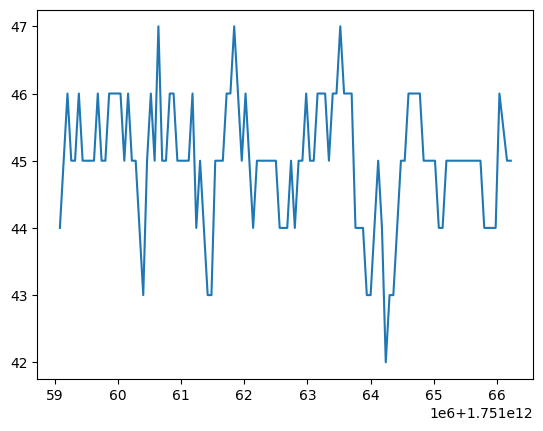

In [115]:
data = pd.DataFrame([x for x in weather_data[5:]])
import matplotlib.pyplot as plt

plt.plot(data['dateutc'], data['humidity'])

In [117]:
data.to_csv('data.csv')

In [31]:
for x in weather_data[1:]:
    new.append(x[0])
new

[{'dateutc': 1751056740000,
  'tempf': 96.8,
  'humidity': 46,
  'windspeedmph': 3.58,
  'windgustmph': 4.47,
  'maxdailygust': 10.29,
  'winddir': 151,
  'uv': 7,
  'solarradiation': 741.17,
  'hourlyrainin': 0,
  'eventrainin': 0,
  'dailyrainin': 0,
  'weeklyrainin': 0,
  'monthlyrainin': 4.457,
  'totalrainin': 71.449,
  'battout': 1,
  'tempinf': 81.1,
  'humidityin': 49,
  'baromrelin': 29.66,
  'baromabsin': 28.857,
  'feelsLike': 106.55,
  'dewPoint': 72.55,
  'feelsLikein': 81.7,
  'dewPointin': 60.1,
  'lastRain': '2025-06-15T19:00:00.000Z',
  'tz': 'America/Chicago',
  'date': '2025-06-27T20:39:00.000Z'},
 {'dateutc': 1751056740000,
  'tempf': 96.8,
  'humidity': 46,
  'windspeedmph': 3.58,
  'windgustmph': 4.47,
  'maxdailygust': 10.29,
  'winddir': 151,
  'uv': 7,
  'solarradiation': 741.17,
  'hourlyrainin': 0,
  'eventrainin': 0,
  'dailyrainin': 0,
  'weeklyrainin': 0,
  'monthlyrainin': 4.457,
  'totalrainin': 71.449,
  'battout': 1,
  'tempinf': 81.1,
  'humidityin': 

In [32]:
pd.DataFrame(new)

,dateutc,tempf,humidity,windspeedmph,windgustmph,maxdailygust,winddir,uv,solarradiation,hourlyrainin,...,humidityin,baromrelin,baromabsin,feelsLike,dewPoint,feelsLikein,dewPointin,lastRain,tz,date
0,1751056740000,96.8,46,3.58,4.47,10.29,151,7,741.17,0,...,49,29.660,28.857,106.55,72.55,81.7,60.1,2025-06-15T19:00:00.000Z,America/Chicago,2025-06-27T20:39:00.000Z
1,1751056740000,96.8,46,3.58,4.47,10.29,151,7,741.17,0,...,49,29.660,28.857,106.55,72.55,81.7,60.1,2025-06-15T19:00:00.000Z,America/Chicago,2025-06-27T20:39:00.000Z
2,1751056800000,97.0,46,1.79,2.24,10.29,176,7,727.59,0,...,49,29.663,28.860,107.02,72.73,81.6,60.0,2025-06-15T19:00:00.000Z,America/Chicago,2025-06-27T20:40:00.000Z
3,1751056860000,97.0,46,1.79,2.24,10.29,182,7,721.58,0,...,49,29.657,28.854,107.02,72.73,81.6,60.0,2025-06-15T19:00:00.000Z,America/Chicago,2025-06-27T20:41:00.000Z


In [ ]:
import time
import requests
import pandas as pd
import duckdb
from datetime import datetime

API_KEY = 'your_api_key'
APP_KEY = 'your_application_key'
DEVICE_URL = 'https://api.ambientweather.net/v1/devices'

DB_PATH = 'weather.duckdb'
TABLE_NAME = 'ambient_weather'

con = duckdb.connect(DB_PATH)

# Create table if not exists (adjust columns as needed)
con.execute(f'''
CREATE TABLE IF NOT EXISTS {TABLE_NAME} (
    date BIGINT,
    macAddress VARCHAR,
    tempf DOUBLE,
    humidity DOUBLE,
    dailyrainin DOUBLE,
    solarradiation DOUBLE,
    uv DOUBLE
)
''')

def fetch_latest_data():
    params = {'apiKey': API_KEY, 'applicationKey': APP_KEY}
    response = requests.get(DEVICE_URL, params=params)
    response.raise_for_status()
    data = response.json()
    if not data:
        return None
    device = data[0]  # assuming one device
    last = device.get('lastData', {})
    if not last:
        return None

    return {
        'date': last.get('date'),  # timestamp in ms
        'macAddress': device.get('macAddress'),
        'tempf': last.get('tempf'),
        'humidity': last.get('humidity'),
        'dailyrainin': last.get('dailyrainin'),
        'solarradiation': last.get('solarradiation'),
        'uv': last.get('uv'),
    }

def insert_data(record):
    df = pd.DataFrame([record])
    con.register('new_data', df)
    con.execute(f'INSERT INTO {TABLE_NAME} SELECT * FROM new_data')

def print_stats():
    # Convert timestamp ms to date string for grouping
    query = f'''
    SELECT
        DATE(FROM_UNIXTIME(date / 1000)) AS day,
        MAX(tempf) AS max_tempf,
        MIN(tempf) AS min_tempf,
        MAX(uv) AS max_uv,
        MIN(uv) AS min_uv,
        MAX(dailyrainin) AS max_rain,
        MIN(dailyrainin) AS min_rain
    FROM {TABLE_NAME}
    GROUP BY day
    ORDER BY day DESC
    LIMIT 1
    '''
    stats = con.execute(query).fetchdf()
    print("Latest daily stats:")
    print(stats)

while True:
    try:
        record = fetch_latest_data()
        if record:
            insert_data(record)
            print(f"Current temp: {record['tempf']}F, UV: {record['uv']}, Rain today: {record['dailyrainin']}in")
            print_stats()
        else:
            print("No data fetched.")
    except Exception as e:
        print("Error:", e)
    time.sleep(60)  # wait 1 minute
